In [2]:
!pip install ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found

In [5]:
from ultralytics import YOLO

# Path to data.yaml inside /kaggle/input
DATA_YAML = "/kaggle/input/chessrender360-warped-subset/ChessRender360_subset_yolo/data.yaml"

# Model choice: nano (fast) → small → medium → large → x
BASE_MODEL = "yolov8s.pt"

# Training hyperparameters
EPOCHS   = 50
BATCH    = 16
IMGSIZE  = 640
PROJECT  = "runs/detect"          # base output folder
NAME     = "chess360_exp1"        # subfolder for this run
CACHE    = True                   # cache images for speed
PATIENCE = 10                     # early stop if no val mAP@0.5 improvement

In [6]:
# Instantiate the model
model = YOLO(BASE_MODEL)

# Train!
model.train(
    data=DATA_YAML,
    epochs=EPOCHS,
    batch=BATCH,
    imgsz=IMGSIZE,
    project=PROJECT,
    name=NAME,
    cache=CACHE,
    patience=PATIENCE,
    device="cuda"   # or "cpu" if no GPU
)

Ultralytics 8.3.115 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/chessrender360-warped-subset/ChessRender360_subset_yolo/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=runs/detect, name=chess360_exp12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 71.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 42.4±17.2 MB/s, size: 330.0 KB)


train: Scanning /kaggle/input/chessrender360-warped-subset/ChessRender360_subset_yolo/train/labels... 4786 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4786/4786 [00:17<00:00, 271.56it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/chessrender360-warped-subset/ChessRender360_subset_yolo/train is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (5.5GB RAM): 100%|██████████| 4786/4786 [00:20<00:00, 231.55it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 51.4±11.5 MB/s, size: 301.3 KB)


val: Scanning /kaggle/input/chessrender360-warped-subset/ChessRender360_subset_yolo/val/labels... 1178 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1178/1178 [00:04<00:00, 268.98it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/chessrender360-warped-subset/ChessRender360_subset_yolo/val is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (1.3GB RAM): 100%|██████████| 1178/1178 [00:05<00:00, 226.70it/s]


Plotting labels to runs/detect/chess360_exp12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/chess360_exp12
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.54G       0.99      1.084      1.038         87        640: 100%|██████████| 300/300 [01:23<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  2.95it/s]


                   all       1178      27588       0.96      0.949      0.982      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.88G     0.6473     0.4777     0.8992         67        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588      0.973      0.966      0.988      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.88G      0.571     0.4124     0.8804         66        640: 100%|██████████| 300/300 [01:29<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.27it/s]

                   all       1178      27588      0.984      0.977      0.991      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.88G     0.5297     0.3752     0.8688         72        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.28it/s]

                   all       1178      27588      0.983      0.978      0.992      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.88G     0.4829     0.3445     0.8556        111        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.27it/s]

                   all       1178      27588      0.982      0.976      0.991      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.88G     0.4715     0.3304     0.8541         35        640: 100%|██████████| 300/300 [01:29<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.30it/s]

                   all       1178      27588      0.988      0.982      0.993      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.88G     0.4415     0.3129     0.8467         56        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588      0.987      0.981      0.993      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.88G     0.4219     0.3009     0.8423         53        640: 100%|██████████| 300/300 [01:29<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.28it/s]

                   all       1178      27588      0.983      0.976      0.991      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.88G     0.4091     0.2916     0.8381         44        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588      0.988       0.98      0.993      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.88G     0.3879     0.2797     0.8347         73        640: 100%|██████████| 300/300 [01:29<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.30it/s]

                   all       1178      27588      0.986      0.982      0.993      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.88G     0.3809     0.2737     0.8335         53        640: 100%|██████████| 300/300 [01:30<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.31it/s]

                   all       1178      27588      0.987      0.982      0.993      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.88G      0.368     0.2658     0.8288         32        640: 100%|██████████| 300/300 [01:30<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.32it/s]

                   all       1178      27588      0.987      0.984      0.993      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.88G     0.3593     0.2598      0.828         95        640: 100%|██████████| 300/300 [01:30<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588      0.989      0.983      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.88G     0.3525     0.2553      0.827         39        640: 100%|██████████| 300/300 [01:30<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588      0.988      0.983      0.994      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.88G     0.3516     0.2542      0.825         89        640: 100%|██████████| 300/300 [01:30<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588      0.986      0.977      0.992       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.88G      0.337     0.2453     0.8229         42        640: 100%|██████████| 300/300 [01:30<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588      0.983      0.985      0.993      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.88G     0.3332     0.2418     0.8229         28        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.28it/s]

                   all       1178      27588      0.988      0.986      0.993      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.88G     0.3247     0.2369       0.82         61        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.27it/s]

                   all       1178      27588      0.985      0.986      0.993      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.88G     0.3234     0.2361     0.8202         87        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.28it/s]

                   all       1178      27588      0.989      0.986      0.993      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.88G     0.3148     0.2305     0.8183         49        640: 100%|██████████| 300/300 [01:30<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.28it/s]

                   all       1178      27588      0.989      0.985      0.993      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.88G      0.311      0.228     0.8173         87        640: 100%|██████████| 300/300 [01:29<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.31it/s]

                   all       1178      27588      0.989      0.984      0.993      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.88G      0.306     0.2234     0.8166         84        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.30it/s]

                   all       1178      27588      0.989      0.986      0.993      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.88G      0.301     0.2199     0.8149         65        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.27it/s]

                   all       1178      27588      0.987      0.987      0.993      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.88G      0.295     0.2178     0.8139         58        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.26it/s]

                   all       1178      27588      0.989      0.986      0.993      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.88G     0.2942     0.2163     0.8146         71        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.31it/s]

                   all       1178      27588      0.991      0.984      0.993      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.88G     0.2886     0.2117     0.8128         38        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.30it/s]

                   all       1178      27588      0.991      0.985      0.994      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.88G     0.2876     0.2099     0.8126         27        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.28it/s]

                   all       1178      27588      0.989      0.986      0.993      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.88G     0.2819     0.2069     0.8118         38        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.28it/s]

                   all       1178      27588      0.993      0.985      0.994      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.88G     0.2785      0.204     0.8098         44        640: 100%|██████████| 300/300 [01:29<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.28it/s]

                   all       1178      27588      0.989      0.989      0.994       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.88G     0.2726      0.201     0.8091         50        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.31it/s]

                   all       1178      27588      0.989      0.988      0.994      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.88G     0.2685     0.1981     0.8082         85        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.31it/s]

                   all       1178      27588       0.99      0.988      0.994      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.88G     0.2634     0.1954     0.8083         55        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.31it/s]

                   all       1178      27588      0.993      0.984      0.994      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.88G     0.2643     0.1939     0.8072         93        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588      0.993      0.986      0.994      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.88G     0.2593     0.1901      0.806         70        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588      0.993      0.987      0.994      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.88G     0.2576      0.189     0.8062         34        640: 100%|██████████| 300/300 [01:30<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588       0.99      0.989      0.994      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.88G     0.2501     0.1864     0.8045        128        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.28it/s]

                   all       1178      27588      0.992      0.987      0.994      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.88G     0.2474     0.1847     0.8046         54        640: 100%|██████████| 300/300 [01:29<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.30it/s]

                   all       1178      27588      0.992      0.987      0.994      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.88G     0.2449     0.1815     0.8051         50        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.27it/s]

                   all       1178      27588      0.992      0.989      0.994      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.88G     0.2386     0.1777     0.8018         83        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.27it/s]

                   all       1178      27588      0.992       0.99      0.994       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.88G     0.2401     0.1786     0.8032         32        640: 100%|██████████| 300/300 [01:30<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588       0.99      0.988      0.994      0.959


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.88G     0.3427      0.202     0.8208         19        640: 100%|██████████| 300/300 [01:27<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.30it/s]

                   all       1178      27588      0.993      0.992      0.994      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.88G     0.3244      0.193     0.8163         53        640: 100%|██████████| 300/300 [01:26<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.31it/s]

                   all       1178      27588      0.995      0.993      0.994       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.88G     0.3105      0.186     0.8132         43        640: 100%|██████████| 300/300 [01:26<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.31it/s]

                   all       1178      27588      0.995      0.994      0.994       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.88G     0.3029     0.1823     0.8102         49        640: 100%|██████████| 300/300 [01:26<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.28it/s]

                   all       1178      27588      0.995      0.994      0.994      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.88G      0.296     0.1762     0.8095         40        640: 100%|██████████| 300/300 [01:26<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588      0.996      0.992      0.994      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.88G     0.2888     0.1739     0.8066         38        640: 100%|██████████| 300/300 [01:26<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.30it/s]

                   all       1178      27588      0.995      0.994      0.994      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.88G     0.2824      0.171     0.8061         48        640: 100%|██████████| 300/300 [01:26<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]

                   all       1178      27588      0.996      0.994      0.994      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.88G     0.2759      0.167      0.804         46        640: 100%|██████████| 300/300 [01:26<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.28it/s]

                   all       1178      27588      0.995      0.995      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.88G     0.2719     0.1654     0.8037         42        640: 100%|██████████| 300/300 [01:26<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.27it/s]

                   all       1178      27588      0.995      0.995      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.88G     0.2674     0.1631     0.8022         41        640: 100%|██████████| 300/300 [01:26<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.27it/s]

                   all       1178      27588      0.996      0.995      0.994       0.97



50 epochs completed in 1.405 hours.
Optimizer stripped from runs/detect/chess360_exp12/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/chess360_exp12/weights/best.pt, 22.5MB

Validating runs/detect/chess360_exp12/weights/best.pt...
Ultralytics 8.3.115 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:17<00:00,  2.08it/s]


                   all       1178      27588      0.995      0.995      0.994      0.972
           white_queen        847        849      0.991      0.983      0.994      0.972
            white_king       1178       1178      0.988      0.992      0.993      0.971
          white_bishop        869       1392      0.996      0.999      0.995      0.967
          white_knight        842       1336      0.999      0.998      0.995      0.972
            white_rook       1064       1915      0.999      0.999      0.995      0.979
            white_pawn       1165       7136      0.999      0.999      0.995       0.97
           black_queen        845        845       0.99      0.981      0.993      0.968
            black_king       1178       1178      0.985      0.994      0.993      0.969
          black_bishop        891       1433          1      0.999      0.995      0.975
          black_knight        823       1301      0.999      0.998      0.995      0.969
            black_roo

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 5.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/chess360_exp12


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e236b9eab10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

Ultralytics 8.3.115 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 489.7±255.9 MB/s, size: 247.6 KB)


val: Scanning /kaggle/input/chessrender360-warped-subset/ChessRender360_subset_yolo/val/labels... 1178 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1178/1178 [00:01<00:00, 737.77it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/chessrender360-warped-subset/ChessRender360_subset_yolo/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:24<00:00,  3.05it/s]


                   all       1178      27588      0.995      0.995      0.994      0.973
           white_queen        847        849      0.991      0.983      0.994      0.972
            white_king       1178       1178      0.989      0.991      0.993      0.972
          white_bishop        869       1392      0.996      0.999      0.995      0.968
          white_knight        842       1336      0.999      0.998      0.995      0.973
            white_rook       1064       1915      0.999      0.999      0.995       0.98
            white_pawn       1165       7136      0.999      0.999      0.995      0.972
           black_queen        845        845       0.99      0.981      0.993       0.97
            black_king       1178       1178      0.985      0.994      0.993      0.969
          black_bishop        891       1433          1      0.999      0.995      0.975
          black_knight        823       1301      0.999      0.998      0.995       0.97
            black_roo

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.4ms preprocess, 10.1ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/val3
Precision (mp):     0.9955
Recall    (mr):     0.9948
mAP@0.5            0.9944
mAP@0.5-0.95       0.9727

Per-class results (precision, recall, AP@0.5, AP@0.5-0.95):
white_queen :  0.991, 0.983, 0.994, 0.972
white_king  :  0.989, 0.991, 0.993, 0.972
white_bishop:  0.996, 0.999, 0.995, 0.968
white_knight:  0.999, 0.998, 0.995, 0.973
white_rook  :  0.999, 0.999, 0.995, 0.980
white_pawn  :  0.999, 0.999, 0.995, 0.972
black_queen :  0.990, 0.981, 0.993, 0.970
black_king  :  0.985, 0.994, 0.993, 0.969
black_bishop:  1.000, 0.999, 0.995, 0.975
black_knight:  0.999, 0.998, 0.995, 0.970
black_rook  :  0.999, 1.000, 0.995, 0.981
black_pawn  :  0.999, 0.998, 0.995, 0.972

Running inference on: /kaggle/input/chessrender360-warped-subset/ChessRender360_subset_yolo/val/images/3417.jpg

image 1/1 /kaggle/input/chessrender360-warped-subset/ChessRender360_subset_yolo/val/images/3417.jp

(-0.5, 999.5, 999.5, -0.5)

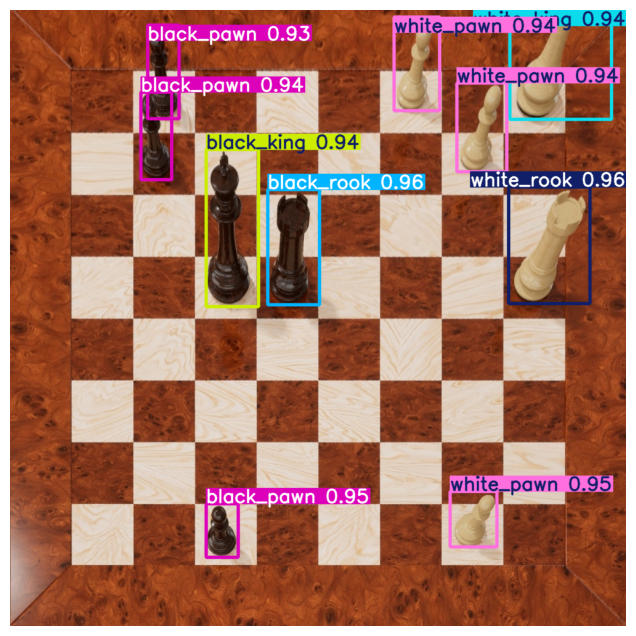

In [10]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 1) Load best weights
best = YOLO("runs/detect/chess360_exp12/weights/best.pt")

# 2) Run validation
metrics = best.val(
    data=DATA_YAML,
    batch=BATCH,
    imgsz=IMGSIZE
)

# 3) Print overall stats
mp, mr, map50, map5095 = metrics.box.mean_results()
print(f"Precision (mp):     {mp:.4f}")
print(f"Recall    (mr):     {mr:.4f}")
print(f"mAP@0.5            {map50:.4f}")
print(f"mAP@0.5-0.95       {map5095:.4f}\n")

# 4) Print per-class results
print("Per-class results (precision, recall, AP@0.5, AP@0.5-0.95):")
for cls_id, cls_name in metrics.names.items():
    p_i, r_i, ap50_i, ap_i = metrics.box.class_result(cls_id)
    print(f"{cls_name:12s}:  {p_i:.3f}, {r_i:.3f}, {ap50_i:.3f}, {ap_i:.3f}")

# 5) Inference on a sample validation image
DATA_ROOT   = os.path.dirname(DATA_YAML)
VAL_IMG_DIR = os.path.join(DATA_ROOT, "val", "images")
val_images  = glob.glob(os.path.join(VAL_IMG_DIR, "*.*"))
if not val_images:
    raise FileNotFoundError(f"No images found in {VAL_IMG_DIR}")
img_path = val_images[0]
print(f"\nRunning inference on: {img_path}")

results = best.predict(
    source=img_path,
    conf=0.25,
    iou=0.45,
    imgsz=IMGSIZE
)

# 6) Display the annotated image inline
annotated = results[0].plot()
annotated = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(annotated)
plt.axis("off")


In [11]:
# ONNX
onnx_path = best.export(format="onnx")  
print("ONNX saved to:", onnx_path)

# TorchScript
ts_path = best.export(format="torchscript")  
print("TorchScript saved to:", ts_path)

Ultralytics 8.3.115 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/chess360_exp12/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 16, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 259.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 262.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 306.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.2s, installed 2 packages: ['onnxslim', 'onnxruntime-gpu']
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.50...
ONNX: export success ✅ 12.6s, saved as 'runs/detect/chess360_exp1